In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
# Import path of the file and read
df = pd.read_csv('C:/Users/Sha/Desktop/BAN/BAN 230-Applied Data mining and Modelling/Coastal Data System Waves.csv')
data = pd.DataFrame(df)
data.head(10)

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,1/01/17 0:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,1/01/17 0:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,1/01/17 1:00,0.763,1.15,4.520,5.513,49.0,25.65
3,1/01/17 1:30,0.770,1.41,4.582,5.647,75.0,25.50
4,1/01/17 2:00,0.747,1.16,4.515,5.083,91.0,25.45
5,1/01/17 2:30,0.718,1.61,4.614,6.181,68.0,25.45
6,1/01/17 3:00,0.707,1.34,4.568,4.705,73.0,25.50
7,1/01/17 3:30,0.729,1.21,4.786,4.484,63.0,25.50
8,1/01/17 4:00,0.733,1.20,4.897,5.042,68.0,25.50
9,1/01/17 4:30,0.711,1.29,5.019,8.439,66.0,25.50


In [53]:
# Iformation about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43730 entries, 0 to 43729
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date/Time       43730 non-null  object 
 1   Hs              43730 non-null  float64
 2   Hmax            43730 non-null  float64
 3   Tz              43730 non-null  float64
 4   Tp              43730 non-null  float64
 5   Peak Direction  43730 non-null  float64
 6   SST             43730 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.3+ MB


In [4]:
# Finding Shape of dataset
data.shape

(43730, 7)

In [6]:
# Finding the missing values before changing the datatypes
data.isna().sum()

Date/Time         0
Hs                0
Hmax              0
Tz                0
Tp                0
Peak Direction    0
SST               0
dtype: int64

In [7]:
# Finding the NULL values before changing the datatypes
data.isnull().sum()

Date/Time         0
Hs                0
Hmax              0
Tz                0
Tp                0
Peak Direction    0
SST               0
dtype: int64

In [37]:
# Dropping Date/Time variable
data = data.drop(['Date/Time'], axis=1)

In [38]:
# Checking the datatypes
data.dtypes

Hs                float64
Hmax              float64
Tz                float64
Tp                float64
Peak Direction    float64
SST               float64
dtype: object

In [39]:
# Finding the Descriptive analysis
data.describe()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
count,43730.00000,43730.000000,43730.000000,43730.000000,43730.000000,43730.000000
mean,1.04114,1.891776,5.412364,8.794855,97.395703,23.207433
std,4.48582,4.580724,4.739217,5.358757,28.782570,9.813160
min,-99.90000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000
25%,0.83800,1.410000,4.974000,7.286000,85.000000,21.900000
50%,1.12900,1.900000,5.525000,8.881000,99.000000,23.950000
75%,1.54200,2.600000,6.162000,10.663000,116.000000,26.050000
max,4.25700,7.906000,10.921000,21.121000,358.000000,28.650000


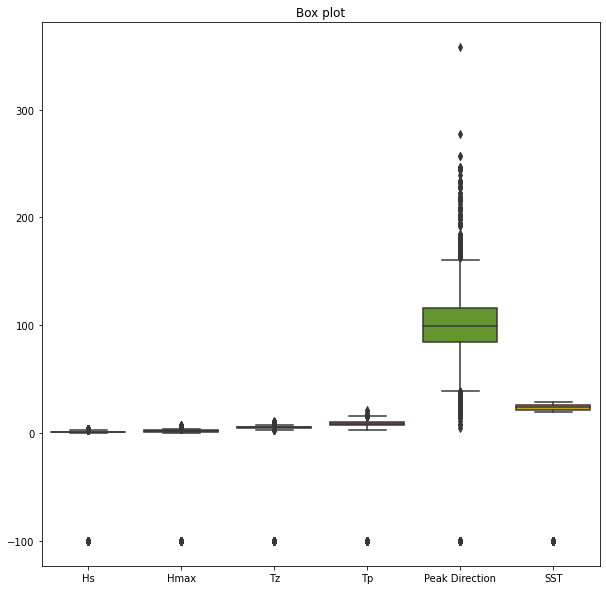

In [40]:
# Boxplot for detecting Outliers
plt.figure(figsize=(10,10))
plt.title('Box plot')
sns.boxplot(data = data.loc[:,:], palette='Dark2')
plt.show()

# Removing Outliers using the Range

In [41]:
outliers = data[(data['Hs'] <0)|(data['Hmax'] <0)|(data['Tz'] <0)|(data['Tp'] <0)|(data['Peak Direction'] <0)|(data['SST'] <0)|(data['Peak Direction'] >180)]
outliers.index

Int64Index([    0,     1,    41,   854,  1555,  1734,  1797,  2457,  2710,
             2711,
            ...
            42466, 42467, 42555, 43084, 43126, 43127, 43128, 43129, 43239,
            43475],
           dtype='int64', length=324)

In [42]:
Data_Without_Outliers_1=data.drop(outliers.index,axis=0)
Data_Without_Outliers_1

,Hs,Hmax,Tz,Tp,Peak Direction,SST
2,0.763,1.15,4.520,5.513,49.0,25.65
3,0.770,1.41,4.582,5.647,75.0,25.50
4,0.747,1.16,4.515,5.083,91.0,25.45
5,0.718,1.61,4.614,6.181,68.0,25.45
6,0.707,1.34,4.568,4.705,73.0,25.50
...,...,...,...,...,...,...
43725,2.299,3.60,9.281,12.765,94.0,21.95
43726,2.075,3.04,9.303,12.722,95.0,21.95
43727,2.157,3.43,9.168,12.890,97.0,21.95
43728,2.087,2.84,8.706,10.963,92.0,21.95


# Removing Outliers using the Quantile

In [43]:
#Find the quantiles
Q1=data.quantile(0.25)
Q2=data.quantile(0.50)
Q3=data.quantile(0.75)
IQR=Q3-Q1
IQR

Hs                 0.704
Hmax               1.190
Tz                 1.188
Tp                 3.377
Peak Direction    31.000
SST                4.150
dtype: float64

In [44]:
cols=data.columns
cols

Index(['Hs', 'Hmax', 'Tz', 'Tp', 'Peak Direction', 'SST'], dtype='object')

In [45]:
Data_Without_Outliers_2= data[~((data[cols]<(Q1-1.5*IQR))|(data[cols]>(Q3 +1.5*IQR))).any(axis=1)]

In [46]:
Data_Without_Outliers_2

,Hs,Hmax,Tz,Tp,Peak Direction,SST
2,0.763,1.15,4.520,5.513,49.0,25.65
3,0.770,1.41,4.582,5.647,75.0,25.50
4,0.747,1.16,4.515,5.083,91.0,25.45
5,0.718,1.61,4.614,6.181,68.0,25.45
6,0.707,1.34,4.568,4.705,73.0,25.50
...,...,...,...,...,...,...
43705,1.757,3.12,7.604,12.277,97.0,21.95
43706,1.766,3.50,7.096,10.156,94.0,22.00
43707,1.829,3.61,6.956,9.741,102.0,22.00
43710,2.030,2.99,7.825,11.535,95.0,22.05


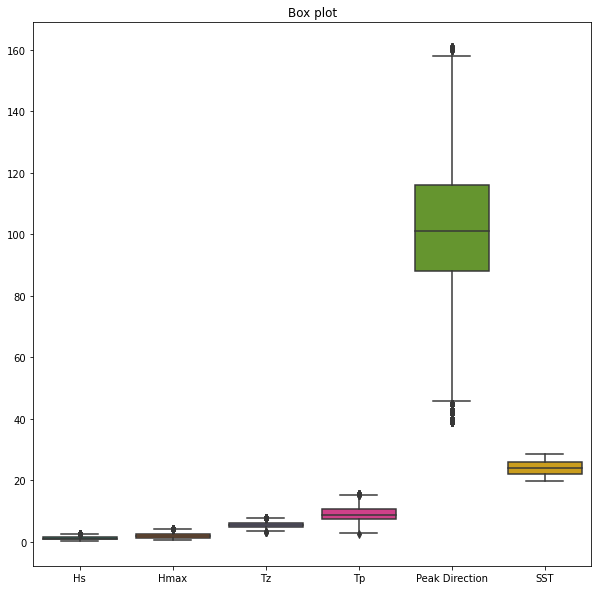

In [47]:
# Boxplot for detecting Outliers
plt.figure(figsize=(10,10))
plt.title('Box plot')
sns.boxplot(data = Data_Without_Outliers_2.loc[:,:], palette='Dark2')
plt.show()

In [48]:
# Removing Duplicated Rows
Duplicated_Rows=Data_Without_Outliers_2[Data_Without_Outliers_2.duplicated(keep='first')]
Duplicated_Rows

,Hs,Hmax,Tz,Tp,Peak Direction,SST
17,0.653,1.21,5.007,6.001,90.0,25.45
25297,1.459,2.45,7.231,10.193,122.0,22.00


We have 2 duplicated rows.

In [49]:
Cleaned_dataset=Data_Without_Outliers_2.drop(Duplicated_Rows.index)
Cleaned_dataset

,Hs,Hmax,Tz,Tp,Peak Direction,SST
2,0.763,1.15,4.520,5.513,49.0,25.65
3,0.770,1.41,4.582,5.647,75.0,25.50
4,0.747,1.16,4.515,5.083,91.0,25.45
5,0.718,1.61,4.614,6.181,68.0,25.45
6,0.707,1.34,4.568,4.705,73.0,25.50
...,...,...,...,...,...,...
43705,1.757,3.12,7.604,12.277,97.0,21.95
43706,1.766,3.50,7.096,10.156,94.0,22.00
43707,1.829,3.61,6.956,9.741,102.0,22.00
43710,2.030,2.99,7.825,11.535,95.0,22.05


In [50]:
print('Shape of the dataset before removing duplicated rows:', Data_Without_Outliers_2.shape)
print('Shape of the dataset after removing duplicated rows:', Cleaned_dataset.shape)

Shape of the dataset before removing duplicated rows: (39995, 6)
Shape of the dataset after removing duplicated rows: (39993, 6)


# Correlated Features

In [51]:
Correlation_Matrix=Cleaned_dataset.corr()
Correlation_Matrix

,Hs,Hmax,Tz,Tp,Peak Direction,SST
Hs,1.000000,0.970378,0.354518,-0.083032,-0.079149,0.252428
Hmax,0.970378,1.000000,0.325240,-0.090145,-0.076589,0.247554
Tz,0.354518,0.325240,1.000000,0.397579,0.008427,0.021102
Tp,-0.083032,-0.090145,0.397579,1.000000,0.271974,-0.199656
Peak Direction,-0.079149,-0.076589,0.008427,0.271974,1.000000,-0.241002
SST,0.252428,0.247554,0.021102,-0.199656,-0.241002,1.000000


C:\Users\Sha\AppData\Local\Temp\ipykernel_12048\2490746168.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  triangle_upper = np.triu(np.ones_like(Correlation_Matrix, dtype=np.bool))


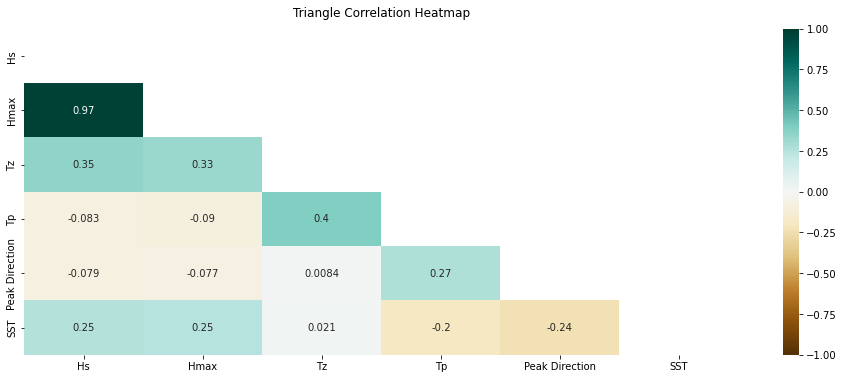

In [52]:
# Plotting Correlation Table
plt.figure(figsize=(16, 6))
triangle_upper = np.triu(np.ones_like(Correlation_Matrix, dtype=np.bool))
heatmap = sns.heatmap(Correlation_Matrix, mask=triangle_upper, vmin=-1, vmax=1, annot=True, cmap='BrBG');
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Data Transformation 

In [53]:
# Pandas Factorize
for c in Cleaned_dataset.columns[data.dtypes == 'object']:
    Cleaned_dataset[c] = Cleaned_dataset[c].factorize()[0]
Cleaned_dataset

,Hs,Hmax,Tz,Tp,Peak Direction,SST
2,0.763,1.15,4.520,5.513,49.0,25.65
3,0.770,1.41,4.582,5.647,75.0,25.50
4,0.747,1.16,4.515,5.083,91.0,25.45
5,0.718,1.61,4.614,6.181,68.0,25.45
6,0.707,1.34,4.568,4.705,73.0,25.50
...,...,...,...,...,...,...
43705,1.757,3.12,7.604,12.277,97.0,21.95
43706,1.766,3.50,7.096,10.156,94.0,22.00
43707,1.829,3.61,6.956,9.741,102.0,22.00
43710,2.030,2.99,7.825,11.535,95.0,22.05


# Normalizing dataset unig MinMaxScalar


In [54]:
from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler

In [55]:
Scaler = preprocessing.MinMaxScaler()
Final_data = Scaler.fit_transform(Cleaned_dataset)
Final_data

array([[0.20355903, 0.16524658, 0.27309408, 0.21479659, 0.08196721,
        0.66101695],
       [0.20659722, 0.232378  , 0.28626035, 0.2251019 , 0.29508197,
        0.6440678 ],
       [0.19661458, 0.16782856, 0.27203228, 0.18172729, 0.42622951,
        0.63841808],
       ...,
       [0.66623264, 0.80041312, 0.79040136, 0.53995232, 0.51639344,
        0.24858757],
       [0.75347222, 0.64033049, 0.9749416 , 0.67792048, 0.45901639,
        0.25423729],
       [0.71961806, 0.65840434, 0.98895732, 0.54618165, 0.39344262,
        0.25423729]])

In [56]:
Final_data = pd.DataFrame(Final_data, columns=Cleaned_dataset.columns)
Final_data.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,0.203559,0.165247,0.273094,0.214797,0.081967,0.661017
1,0.206597,0.232378,0.286260,0.225102,0.295082,0.644068
2,0.196615,0.167829,0.272032,0.181727,0.426230,0.638418
3,0.184028,0.284018,0.293056,0.266169,0.237705,0.638418
4,0.179253,0.214304,0.283287,0.152657,0.278689,0.644068


In [57]:
Final_data.describe()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
count,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000
mean,0.395973,0.393778,0.501057,0.486982,0.506521,0.473192
std,0.205137,0.206178,0.172811,0.173169,0.165766,0.251334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235243,0.232378,0.379698,0.363685,0.401639,0.242938
50%,0.361111,0.358120,0.486940,0.474583,0.508197,0.474576
75%,0.531684,0.529305,0.610321,0.605322,0.631148,0.706215
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
y = Final_data.loc[:, Final_data.columns == 'Hs']
x = Final_data.loc[:, Final_data.columns != 'Hs']

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Final_data, y, test_size = 0.3, random_state = 0)

In [78]:
x_train.shape

(27995, 6)

In [79]:
y_train.shape

(27995, 1)

In [80]:
x_test.shape

(11998, 6)

In [81]:
y_test.shape

(11998, 1)

# Linear Regression Model

In [86]:
import statsmodels.api as sm

In [87]:
Linear_model = sm.OLS(y_train, x_train)
Linear_model_ets = Linear_model.fit()
Linear_model_ets.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     Hs   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.697e+34
Date:                Sat, 15 Oct 2022   Prob (F-statistic):                        0.00
Time:                        22:53:31   Log-Likelihood:                      9.9071e+05
No. Observations:               27995   AIC:                                 -1.981e+06
Df Residuals:                   27989   BIC:                                 -1.981e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Hs                 1.0000   1.27e-17   7.85e+16      0.000       1.000       1.000
Hmax           -1.787e-16   1.25e-17    -14.325      0.000   -2.03e-16   -1.54e-16
Tz             -1.301e-17   4.19e-18     -3.109      0.002   -2.12e-17   -4.81e-18
Tp               1.36e-16   4.04e-18     33.638      0.000    1.28e-16    1.44e-16
Peak Direction  1.258e-16   3.26e-18     38.523      0.000    1.19e-16    1.32e-16
SST             4.597e-17    2.3e-18     19.945      0.000    4.15e-17    5.05e-17
==============================================================================
Omnibus:                     2526.500   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3303.627
Skew:                           0.784   Prob(JB):                         0.00
Kurtosis:                       3.610   Cond. No.                         33.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R²:
R² is the coefficient of determination that tells us that how much percentage variation dependent variable can be explained by independent variable. Here, 100 % variation in Y can be explained by X. The maximum possible value of R2  can be 1, means the larger the R2  value better the regression.

Skewness & Kurtosis:
Skewness is 0.784 which means slightly positive skewed and Kurtosis is 3.610 means the distribution is having heavier tails than normal distribution with positive kurtosis.

P value:
The p-value is <0.05, which tells us that the intercept terms are statistically different than zero.
